# MAE6292 - Homework \# 2

Camera Calibration and Object Rendering

## Import Modules



In [115]:
import numpy as np
import matplotlib.pyplot as plt

import cv2

## imshow

It turns out that `cv2.imshow()` does not work in Jupter Notebook as well. You may use the follwing function `cv2_imshow` instead. 

In [116]:
def cv2_imshow(image):
    plt.figure(dpi=200)
    mode = len(np.shape(image))
    if mode==3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    elif mode==2:
        plt.imshow(image, cmap='gray')
    else:
        print('Unsuported image size')
        raise
    plt.xticks([]), plt.yticks([]) 
    plt.axis('off')

## Getting Checkerboard

Get a 6x4 checkerboard image at [checkerboards](https://raw.githubusercontent.com/MarkHedleyJones/markhedleyjones.github.io/master/media/calibration-checkerboard-collection/Checkerboard-A4-40mm-6x4.pdf
)

You have three options to generate your own photo image of the above checkerboard.

1. Print the above pdf file, and leave it on a flat surface. Take a photo with your phone or camera. Make it sure that **the upper, left square is black** in your photo. Otherwise, the detected corners will be arranged in the reverse order. 
2. If you don't have a printer, display it on your monitor and take a photo with your phone. (Clean your monitor, and increase brightness and contrast)
3. (**Not** recommended) If both of 1 and 2 do not work, use `IMG_0535.png` in the git repository

Copy the photo file into your homework folder. 

## Problem 1 (Detect Corners)

In this part, 

1. Detect the corners with `cv2.findChessboardCorneres()` (recall the size of the board is determined by the number of the inner corners)
2. Refine the corners with `cv2.cornerSubPix()`
3. Draw the refined corners with `cv2.drawChessboardCorners()`

Save your image with the detected corners as **`prob1.png`**


[[199 199 199 ... 231 232 233]
 [199 199 199 ... 232 233 233]
 [199 199 199 ... 233 233 234]
 ...
 [220 219 219 ... 195 195 196]
 [220 219 219 ... 195 195 196]
 [220 219 219 ... 195 195 196]]


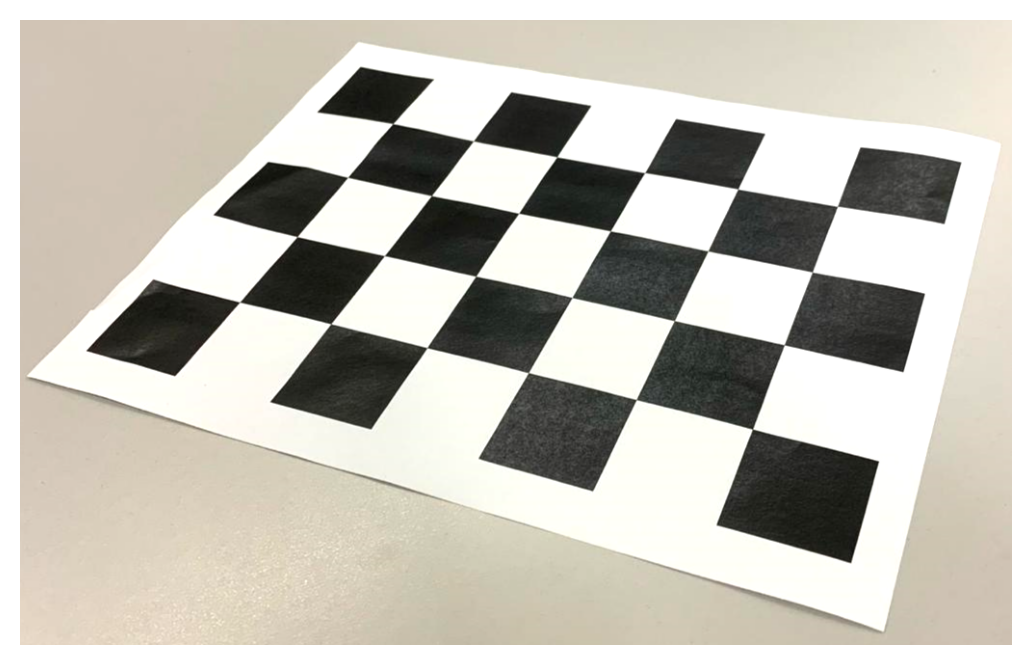

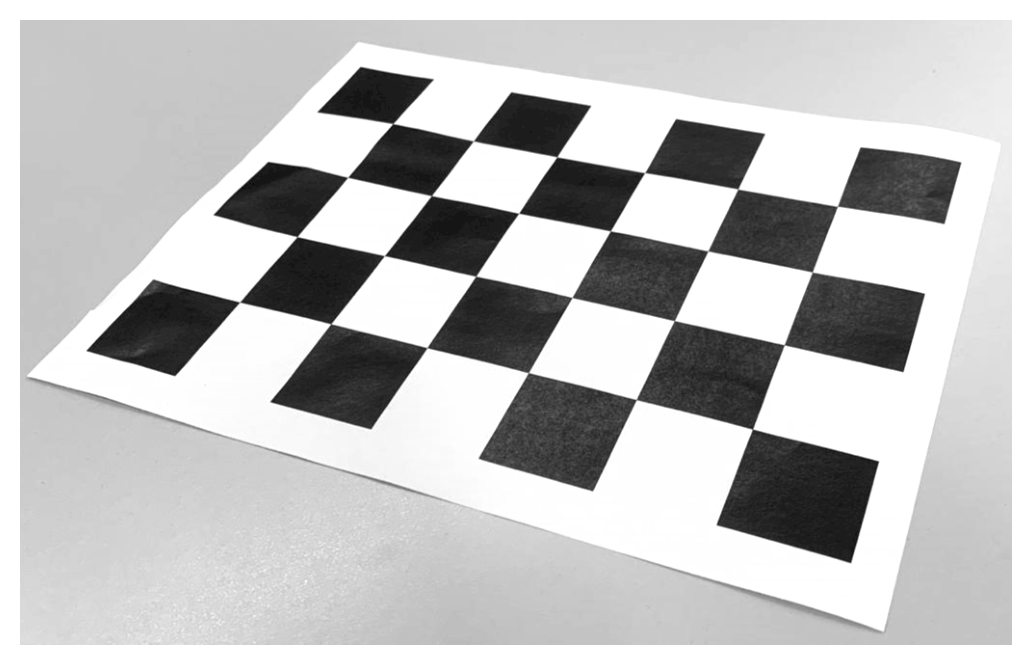

In [117]:
img = cv2.imread('my_image.png')
cv2_imshow(img)
# turn the image into grayscale
img_gray = cv2.imread('my_image.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img_gray)

print(img_gray)


True
(24, 1, 2)
[[[227.95892 293.50977]]

 [[287.75192 225.67555]]

 [[340.34976 164.27051]]

 [[386.94974 108.5833 ]]

 [[322.7822  315.86874]]

 [[378.338   245.53879]]

 [[427.45688 183.2011 ]]

 [[470.57278 126.53397]]

 [[422.6698  340.6893 ]]

 [[473.27744 266.64343]]

 [[517.67175 201.41246]]

 [[557.5651  142.85048]]

 [[527.8114  366.60367]]

 [[573.1501  288.6071 ]]

 [[613.05676 219.76685]]

 [[648.6405  159.42165]]

 [[639.97614 394.54523]]

 [[679.3512  312.65054]]

 [[714.2926  240.49593]]

 [[745.4768  176.22128]]

 [[760.48303 425.15594]]

 [[793.4401  337.80466]]

 [[822.5372  262.2795 ]]

 [[848.60114 194.39314]]]


True

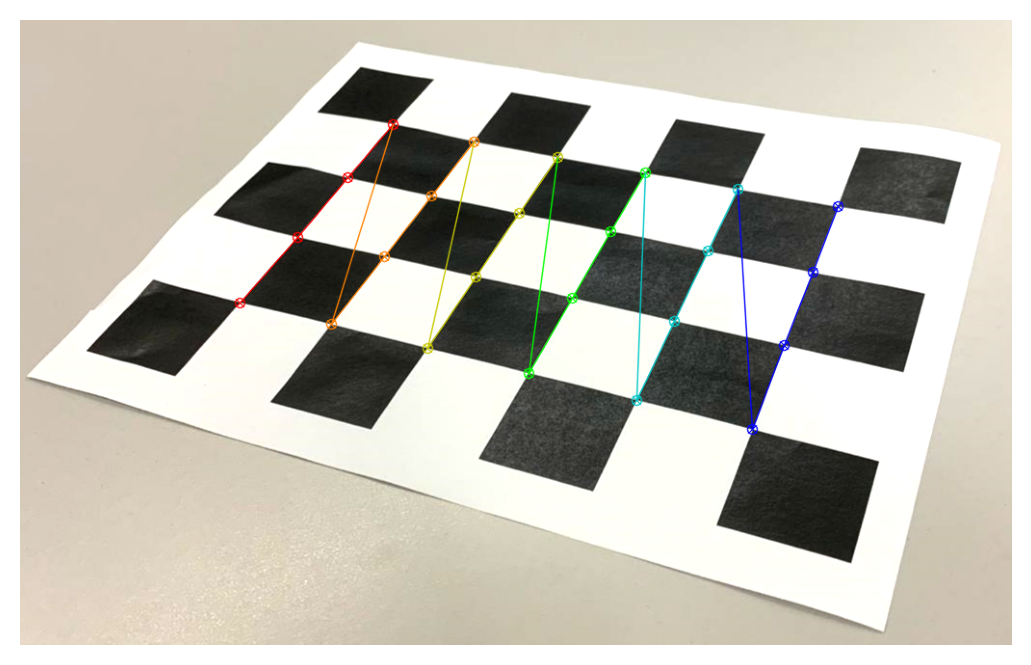

In [118]:
# detect and refine corners
CHECKER = (4,6) 
flag_found, corners = cv2.findChessboardCorners(img_gray, CHECKER)

print(flag_found)
print(corners.shape)
print(corners)

#check if the board corners were found 
img_corner = img.copy()
cv2.drawChessboardCorners(img_corner, CHECKER, corners, flag_found)
cv2_imshow(img_corner)
cv2.imwrite('prob1.png', img_corner)

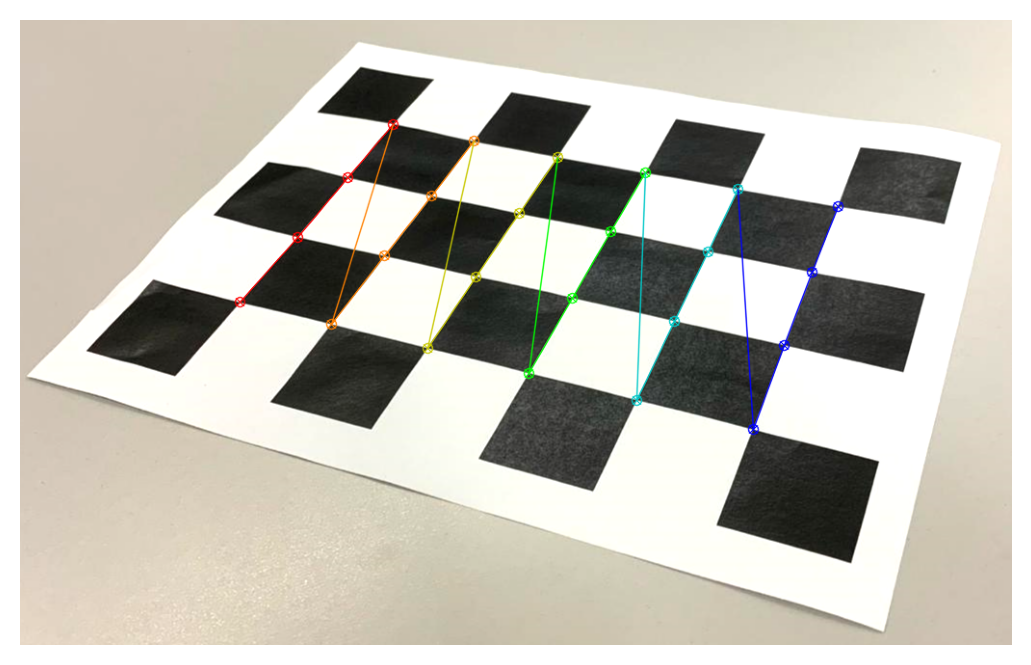

In [119]:
criteria_subpix = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
corners_refined = cv2.cornerSubPix(img_gray, corners, (11, 11), (-1, -1), criteria_subpix)

img_corner = img.copy()

cv2.drawChessboardCorners(img_corner, CHECKER, corners, flag_found)
cv2_imshow(img_corner) 

## Problem 2 (Calibrate Camera)

1. Create an array `obj_points` for the 3D world coordinates of the corners detected above. It should follow the same order as the corners. You may set `CHECKER_WIDTH=1`, i.e., the unit-length in the world coordinates corresponds to the side of one square. 

   You can define any world frame. In class, we defined it such that the origin is at the upper-left inner corner; the x-axis points toward righit; the y-axis point toward down; and the z-axis points down into the board.


2. Calibrate camera with `cv2.calibrateCamera`
3. Print the calibration matrix `K`
4. Print the vector from the origin of the world frame to the origin of the camera frame, resolved in the world frame.

In [85]:
# Creating vector to store vectors of 3D points for each checkerboard image
CHECKER_WIDTH = 0.025

obj_points = np.zeros( (CHECKER[0] * CHECKER[1], 1, 3 ), np.float32)

# Iterate through images and find corners
for i in range(CHECKER[1]):
    for j in range (CHECKER[0]):
        obj_points[i*CHECKER[0]+j,0,:]=np.array([[j,i,0]])
obj_points *= CHECKER_WIDTH

print(obj_points.shape)
print(obj_points.dtype)
print(obj_points)


(24, 1, 3)
float32
[[[0.    0.    0.   ]]

 [[0.025 0.    0.   ]]

 [[0.05  0.    0.   ]]

 [[0.075 0.    0.   ]]

 [[0.    0.025 0.   ]]

 [[0.025 0.025 0.   ]]

 [[0.05  0.025 0.   ]]

 [[0.075 0.025 0.   ]]

 [[0.    0.05  0.   ]]

 [[0.025 0.05  0.   ]]

 [[0.05  0.05  0.   ]]

 [[0.075 0.05  0.   ]]

 [[0.    0.075 0.   ]]

 [[0.025 0.075 0.   ]]

 [[0.05  0.075 0.   ]]

 [[0.075 0.075 0.   ]]

 [[0.    0.1   0.   ]]

 [[0.025 0.1   0.   ]]

 [[0.05  0.1   0.   ]]

 [[0.075 0.1   0.   ]]

 [[0.    0.125 0.   ]]

 [[0.025 0.125 0.   ]]

 [[0.05  0.125 0.   ]]

 [[0.075 0.125 0.   ]]]


In [121]:
#calibrating the camera        
err, K, dist_coeff, rvecs, tvecs = cv2.calibrateCamera([obj_points], [corners_refined], img_gray.shape[::-1], None, None)

# print(err)
print('The matrix K is ')
print(K)
# print(dist_coeff)

# Convert the rotation vector to a rotation matrix using cv2.Rodrigues
R,_   = cv2.Rodrigues(rvecs[0])
T = tvecs[0]

#print(T)
#print(R)
#print(-R.T@T)#vector from W to C resolved in W, i.e., where was the camera in W

The matrix K is 
[[1.55210581e+03 0.00000000e+00 5.69033525e+02]
 [0.00000000e+00 3.56266288e+03 2.89851381e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


## Problem 3 (Draw a Cube)

Here we are going to draw a cube as illustrated below.
Note that the side of the cube is equal to the side of the checkerboard sequare, and the cube is at the white square in the middle.

![](img_cube.png)

1. Define a `4 x 8 np.array`, namely `vertices`, whose column corresponds to the homogeneous coordinates of each vertex of the above cube. Recall the point `(x,y,z)` becomes `(x,y,z,1)` in the homogeneous coordinate. For example, the first vertex on the bottom surface is at [2,1,0,1], and the second is at [3,1,0,1]
2. Define a list of [tuples](https://www.w3schools.com/python/python_tuples.asp), namely `edges` corresponding to 12 edges of the cube. For example, if the vertex 0 is connected to the vertex 1, the corresponding edge is defined by `edges = [ (0,1) ]`. As there are 12 edges, `edges` should contain 12 tuples. 
3. Use `cv2.line` to draw 12 edges, to complete the cube. You may choose any color, but the line width should be greater than or equal to `2`
4. Make it sure that the cube is at the white square in the middle. Save your image as `prob3.png`

True

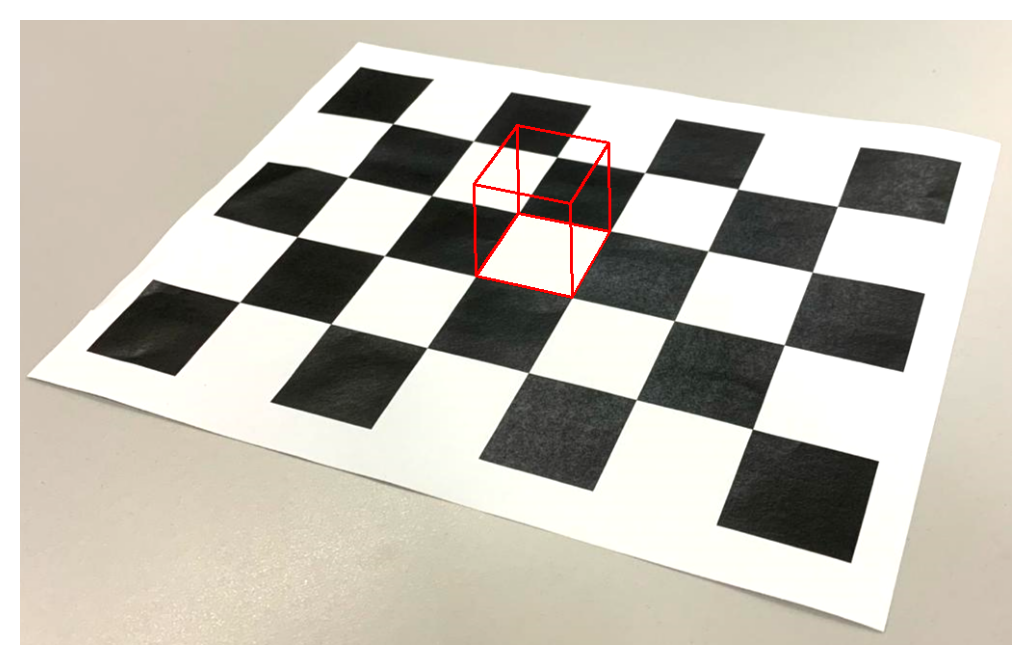

In [123]:

M = K @ np.concatenate( (R, T) , axis=1)

img_line = img.copy()

# Translating to the centre square
center_translation = np.array([1*CHECKER_WIDTH,2*CHECKER_WIDTH,0,0])

# TODO: To come up with coordinates 
coordinates = [
    # Bottom layer
    [[0,0,0,1], [CHECKER_WIDTH,0,0,1]],
    [[0,0,0,1], [0,CHECKER_WIDTH,0, 1]],
    [[0,CHECKER_WIDTH,0,1], [CHECKER_WIDTH,CHECKER_WIDTH,0, 1]],
    [[CHECKER_WIDTH, CHECKER_WIDTH,0,1], [CHECKER_WIDTH,0,0, 1]],

    # Top layer
    [[0,0,-0.01,1], [CHECKER_WIDTH,0,-0.01, 1]],
    [[0, 0,-0.01,1], [0,CHECKER_WIDTH,-0.01, 1]],
    [[0, CHECKER_WIDTH,-0.01,1], [CHECKER_WIDTH,CHECKER_WIDTH,-0.01, 1]],
    [[CHECKER_WIDTH, CHECKER_WIDTH,-0.01,1], [CHECKER_WIDTH,0,-0.01, 1]],

    # Pillars connecting layers
    [[0, 0,0,1], [0,0,-0.01, 1]],
    [[CHECKER_WIDTH,0,0,1], [CHECKER_WIDTH,0,-0.01, 1]],
    [[CHECKER_WIDTH, CHECKER_WIDTH,0,1], [CHECKER_WIDTH,CHECKER_WIDTH,-0.01, 1]],
    [[0,CHECKER_WIDTH,0,1], [0,CHECKER_WIDTH,-0.01, 1]],
    ]

for cord in coordinates:
    x, y = (np.array(cord[0])+center_translation).tolist(), (np.array(cord[1])+center_translation).tolist()
    p_W = np.array([x, y]).T
    p_I = M @ p_W # homogeneous coordinate of pixel
    p_I = p_I[0:2,:]/p_I[2,:] # float-valued pixel coordinate
    p_I = p_I.astype(int) # integer-valued pixel cooridnate (u,v)
    cv2.line(img_line, (p_I[0,0], p_I[1,0]), (p_I[0,1], p_I[1,1]), (0,0,255), 2)

cv2_imshow(img_line)
cv2.imwrite('prob3.png', img_line)

## How to Turn in

Make it sure you add the following three files to the repository before pusing it back to github.
1. Your image file
2. prob1.png
3. prob3.png